# quant-econ Solutions: Estimation of Spectra

Solutions for http://quant-econ.net/jl/estspec.html

In [1]:
using QuantEcon
using PyPlot

srand(42)  # reproducible results

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[964434469,1073036706,1860149520,1073503458,1687169063,1073083486,-399267803,1072983952,-909620556,1072836235  …  -293054293,1073002412,-1300127419,1073642642,1917177374,-666058738,-337596527,1830741494,382,0]),[2.31984e-310,0.0,2.31984e-310,0.0,2.31984e-310,0.0,2.31984e-310,0.0,2.31984e-310,0.0  …  NaN,0.0,0.0,4.98251e-316,4.98252e-316,4.98254e-316,2.24965e-312,4.98251e-316,4.98248e-316,4.99699e-316],382,UInt32[0x0000002a])

## Exercise 1

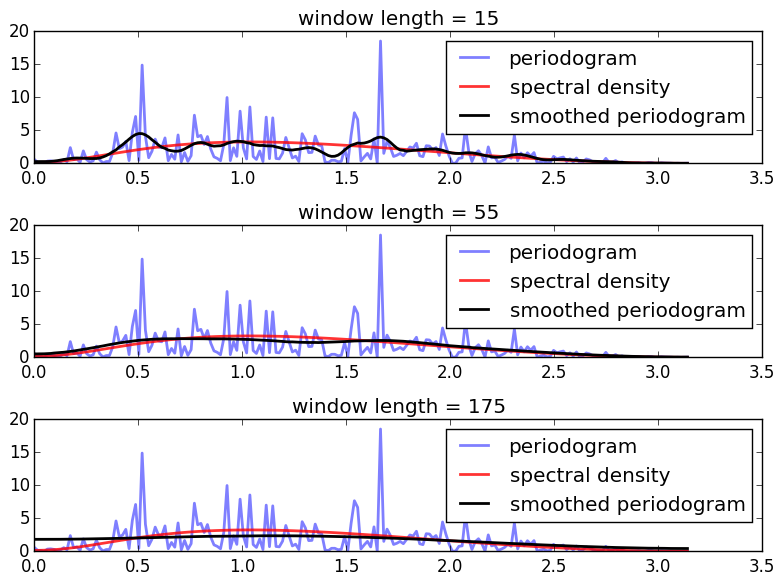

In [4]:
n = 400
phi = 0.5
theta = [0, -0.8]
lp = ARMA(phi, theta)
X = simulation(lp, ts_length=n)

fig, ax = subplots(3, 1)
for (i, wl) in enumerate([15, 55, 175])  # window lengths
    x, y = periodogram(X)
    ax[i][:plot](x, y, "b-", lw=2, alpha=0.5, label="periodogram")

    x_sd, y_sd = spectral_density(lp, two_pi=false, res=120)
    ax[i][:plot](x_sd, y_sd, "r-", lw=2, alpha=0.8, label="spectral density")

    x, y_smoothed = periodogram(X, "hamming", wl)
    ax[i][:plot](x, y_smoothed, "k-", lw=2, label="smoothed periodogram")

    ax[i][:legend]()
    ax[i][:set_title]("window length = $wl")
end

tight_layout()
fig[:show]()

## Exercise 2